In [391]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import math

# Задание №1

In [392]:
h = math.pi / 30 # шаг
a = 0 # левая граница
b = 1 # правая граница
lam = 1 / 2 # коэфф перед ядром интегрального уравнения
K = lambda x, s: x * s # ядро интегрального уравнения
f = lambda x: 5 / 6 * x # свободный член интегрального уравнения
y_true = lambda x1: x1 # точное решение интегрального уравнения

In [393]:
def Quadrature_method(K, f, h, x):
    n = len(x)
    wt = 1 / 2
    wj = 1
    A = np.zeros((n, n))
    B = np.zeros((n, 1))
    for i in range(n):
        A[i][0] = -h * wt * K(x[i], x[0])

        for j in range(1, n-1):
            A[i][j]= -h * wj * K(x[i], x[j])

        A[i][n-1]= -h * wt * K(x[i], x[n-1])
        A[i][i]= A[i][i] + 1
        B[i][0] = f(x[i])
        
    y = np.linalg.solve(A, B)
    return y


In [394]:
x = np.arange(a, b, h)
n = len(x)
y_true = np.array(y_true(x)) # точное решение
y_approx = Quadrature_method(K, f, h, x) # найденное решение

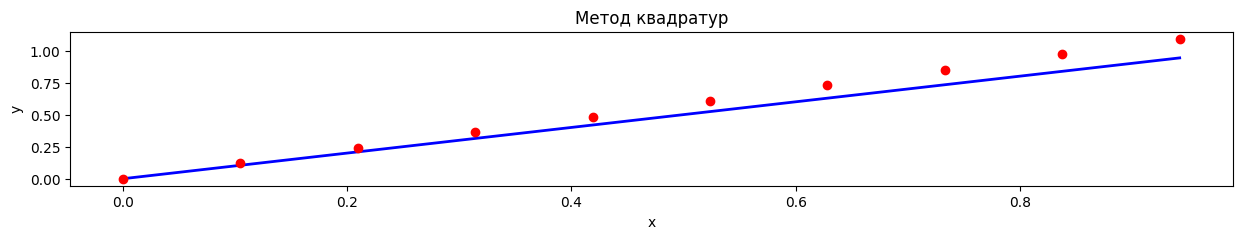

In [395]:
plt.figure(figsize = (15, 2))
plt.plot(x, y_true, '-b', linewidth=2) # график точного решения
plt.plot(x, y_approx, 'or') # график найденного решения
plt.title('Метод квадратур')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Задание №2

In [396]:
a = 0 # левая граница
b = 1.0 # правая граница
h = 0.05 # шаг
Lambda = -1

alpha = lambda t: [t, t*t, t**3/2]
beta = lambda t: [1, t, t**2]
f = lambda t: np.exp(t) - 1
y_exact = lambda t: t / t # точное решение

In [397]:
def bfun(t, m, f):
    return beta(t)[m] * f(t)

def Aijfun(t, m, k):
    return beta(t)[m] * alpha(t)[k]

def Solve(f,t,Lambda):
    m = len(alpha(0)) # определяем размер alpha
    M = np.zeros((m, m))
    r = np.zeros((m, 1))
    for i in range(m):
        r[i] = integrate.quad(bfun, a, b, args = (i, f))[0]

        for j in range(m):
            M[i][j] =- Lambda * integrate.quad(Aijfun, a, b, args = (i,j))[0]

    for i in range(m):
        M[i][i] = M[i][i] + 1

    c = np.linalg.solve(M, r)
    
    return Lambda * (c[0] * alpha(t)[0] + c[1] * alpha(t)[1]) + f(t)

C:\Users\Sofia\AppData\Local\Temp\ipykernel_5476\2514404061.py:9: RuntimeWarning: invalid value encountered in divide
  y_exact = lambda t: t / t # точное решение


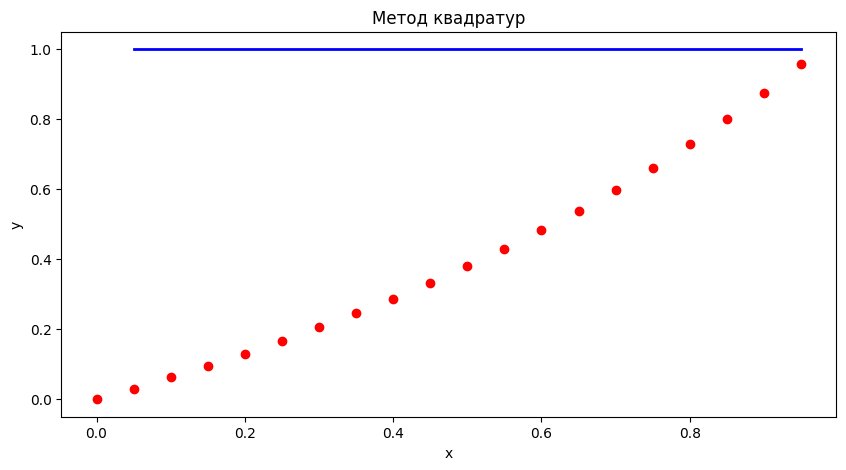

In [398]:
x = np.arange (a, b, h)
n = len(x)
y = np.array(y_exact(x)) # точное решение
y_approx = Solve(f, x, Lambda)
plt.figure(figsize=(10, 5))
plt.plot(x, y, '-b', linewidth=2) # график точного решения
plt.plot(x, y_approx, 'or') # график найденного решения
plt.title('Метод квадратур')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Задание №3

In [399]:
a = -1.0 # левая граница
b = 1.0 # правая граница
h = 0.05 # шаг
Lambda = - 1

fi1= lambda t: t
fi2 = lambda t: t * t
psi1 = lambda t: 1
psi2 = lambda t: t
f = lambda t: 1
y_exact = lambda t: 1 + 6 * t * t # точное решение
K = lambda x, s: x * x + x * s # ядро интегрального уравнения

In [400]:
def GP(s, t, Lambda):
    m = 2 
    M = np.zeros((m, m))
    r = np.zeros((m, 1))
    fi = [fi1, fi2]
    psi = [psi1, psi2]
    for i in range(m):
        r[i] = -2 * Lambda * integrate.quad(lambda t: psi[i](t) * integrate.quad(lambda s:K(t, s) * f(t), a, b)[0], a, b)[0]
        for j in range(m):
            M[i][j] = -integrate.quad(lambda t: fi[i](t) * psi[i](t), a, b)[0] - Lambda * integrate.quad(lambda t: psi[i](t) * integrate.quad(lambda s: K(t, s) * fi[j](s), a, b)[0], a, b)[0]

    c = np.linalg.solve(M, r)
    return  (c[0] * fi1(t) + c[1] * fi2(t)) + f(t)

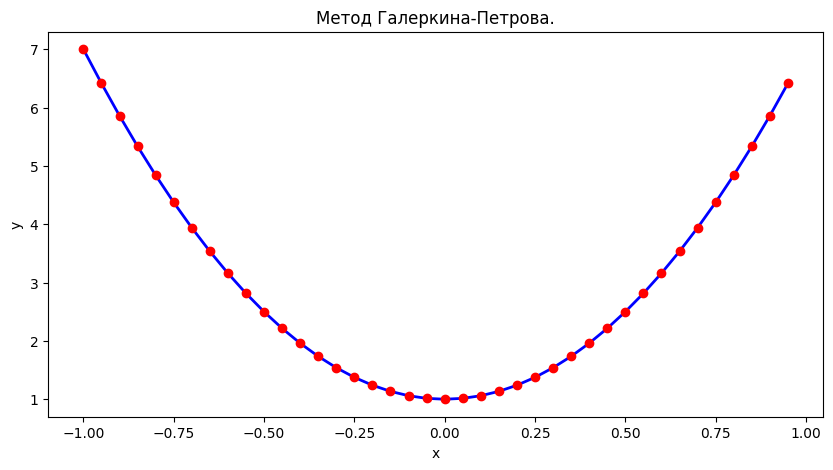

In [401]:
x = np.arange (a, b, h)
n = len(x)
y = np.array(y_exact(x)) # точное решение
y_approx = GP(f, x, Lambda)
plt.figure(figsize=(10, 5))
plt.plot(x, y, '-b', linewidth=2) # график точного решения
plt.plot(x, y_approx, 'or') # график найденного решения
plt.title('Метод Галеркина-Петрова.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()